<a href="https://colab.research.google.com/github/kaushkay/midass-iiitd/blob/master/CV_Problem/CV_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Loading Dataset.

from zipfile import ZipFile
file_name = 'Vision_task_dataset_public-20190406T201525Z-001.zip'

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print("Done")

Done


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from keras.utils import np_utils
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

In [0]:
train_images = pd.read_pickle('Vision_task_dataset_public/train_image.pkl')
train_labels = pd.read_pickle('Vision_task_dataset_public/train_label.pkl')
test_images = pd.read_pickle('Vision_task_dataset_public/test_image.pkl')

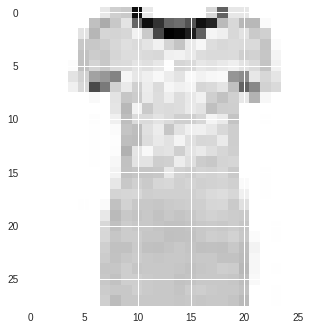

In [9]:
# Plotting the image!

xyz = np.array(train_images)
xyz = np.reshape(xyz, (xyz.shape[0], 28, 28))
plt.imshow(xyz[45])

In [0]:
images = np.array(train_images)
images = np.reshape(images, (images.shape[0], 1, 28, 28))
labels = np.array(train_labels)

In [11]:
images.shape

(8000, 1, 28, 28)

In [12]:
labels.shape

(8000,)

In [13]:
np.unique(labels)

array([0, 2, 3, 6])

In [0]:
labels = np_utils.to_categorical(labels)

In [15]:
labels.shape

(8000, 7)

In [0]:
#Spliting into Train-Val Set
train_features, val_features, train_labels, val_labels = train_test_split(images, labels, test_size=0.15)

In [17]:
print('train_features shape: ', train_features.shape)
print('val_features shape: ', val_features.shape)
print('train_labels shape: ', train_labels.shape)
print('val_labels shape: ', val_labels.shape)

train_features shape:  (6800, 1, 28, 28)
val_features shape:  (1200, 1, 28, 28)
train_labels shape:  (6800, 7)
val_labels shape:  (1200, 7)


In [0]:
# hyperparameters
epochs = 30
batch_size = 256

In [19]:
# buildinf the model
n_classes = 7
model = keras.models.Sequential()


model.add(keras.layers.InputLayer(input_shape=(1, 28, 28))) #Adding Input Layer

model.add(keras.layers.BatchNormalization())#Addign Batch Normalization


model.add(keras.layers.convolutional.Conv2D(64, (5, 5), activation='relu',
          bias_initializer='RandomNormal', kernel_initializer='random_uniform',data_format='channels_first'))

# adding Different Conv and pooling layers in the model
model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.convolutional.Conv2D(512, (5, 5), activation='relu'))

model.add(keras.layers.convolutional .MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dropout(0.30)) #Adding Dropout Regularizatn

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dropout(0.40)) #Adding Dropout Regularizatn

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dropout(0.5)) #Adding Dropout Regularizatn

model.add(keras.layers.Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Using Adam Optimizer

from keras.optimizers import Adam
optimizer = Adam(decay=0.001)

In [0]:
# compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# To show diffent layers present in the model

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 8, 512)        307712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 4, 512)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28672)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3670144   
__________

In [23]:
# training the model by feeding the Train_data and checking it in Val set
training = model.fit(train_features, train_labels,
                     validation_data=(val_features, val_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 6800 samples, validate on 1200 samples
Epoch 1/30
6800/6800 [==============================] - 7s 1ms/step - loss: 1.6248 - acc: 0.3060 - val_loss: 1.1053 - val_acc: 0.6092
Epoch 2/30
6800/6800 [==============================] - 3s 380us/step - loss: 1.0697 - acc: 0.5534 - val_loss: 0.7262 - val_acc: 0.6700
Epoch 3/30
6800/6800 [==============================] - 3s 375us/step - loss: 0.8457 - acc: 0.6487 - val_loss: 0.6426 - val_acc: 0.7017
Epoch 4/30
6800/6800 [==============================] - 3s 376us/step - loss: 0.7348 - acc: 0.6890 - val_loss: 0.6201 - val_acc: 0.7492
Epoch 5/30
6800/6800 [==============================] - 3s 375us/step - loss: 0.6785 - acc: 0.7207 - val_loss: 0.6290 - val_acc: 0.7317
Epoch 6/30
6800/6800 [==============================] - 3s 375us/step - loss: 0.6308 - acc: 0.7528 - val_loss: 0.5407 - val_acc: 0.7842
Epoch 7/30
6800/6800 [==============================] - 3s 379us/step - loss: 0.5766 - acc

In [0]:
# To print the test image
test_images = np.array(test_images)

In [25]:
test_images.shape

(2000, 784)

In [0]:
qwe = np.reshape(test_images, (test_images.shape[0], 28, 28))

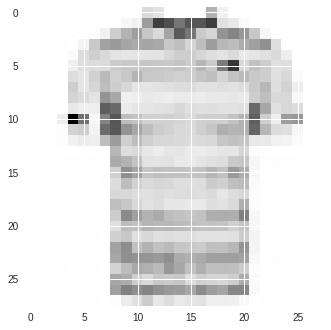

In [27]:
plt.imshow(qwe[2])

In [0]:
# Reshaping the test set so that it could into the algo
test_images = test_images.reshape((test_images.shape[0], 1, 28, 28))

In [29]:
test_images.shape

(2000, 1, 28, 28)

In [0]:
# Predicting on the test set
predict = model.predict(test_images)

In [31]:
predict.shape

(2000, 7)

In [0]:
predicted_class = np.argmax(predict, axis=1)

In [0]:
# creating the dataframe of the predictions done by the model
df = pd.DataFrame(data=predicted_class, index = range(test_images.shape[0]))

In [0]:
df.columns=['predicted class']

In [0]:
df.index.name = 'Test_image_index'

In [36]:
df.head()

,predicted class
Test_image_index,
0,0
1,0
2,0
3,0
4,0


In [0]:
# saving prediction into csv
df.to_csv('kaushlendra_kumar_giri.csv')

In [0]:
# Downloading the csv from colab
from google.colab import files
files.download('kaushlendra_kumar_giri.csv')